# Домашнее задание 6. Визуализация

27 ноября 1895 года Альфред Нобель подписал в Париже свое последнее завещание. Когда завещание было вскрыто после его смерти, оно вызвало много споров, поскольку Нобель оставил большую часть своего состояния для учреждения премии.

Альфред Нобель постановил, что все его оставшееся состояние должно быть использовано для учреждения "премий тем, кто в течение предшествующего года принес наибольшую пользу человечеству".

Каждый год Нобелевская премия присуждается ученым и исследователям в категориях химии, литературы, физики, физиологии или медицины, экономики и мира.


Давайте посмотрим, какие закономерности мы можем найти в данных о прошлых нобелевских лауреатах.

In [1]:
import pandas as pd
import numpy as np
# импортируйте нужные библиотеки для визуализации

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/DPO-CS/DPO_Python_DS13/main/Lect%2017%20plotly/nobel_prize_data.csv')

In [3]:
df.head()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE


## Задание 1

Визуализируйте распределение возраста лауреатов на момент награждения (**winning_age**) в виде гистограммы с помощью функции [.histplot()](https://seaborn.pydata.org/generated/seaborn.histplot.html).
Поэкспериментируйте с размером bin. Попробуйте 10, 20, 30 и 50.

Чтобы сделать содержательные выводы, выведите описательную статистику для возраста лауреата на момент награждения (.describe())

In [4]:
# Рассчитаем возраст лауреатов
df['birth_date'] = pd.to_datetime(df['birth_date'])
df['winning_age'] = df['year'] - df['birth_date'].dt.year
df.head()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,winning_age
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,49.0
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA,62.0
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL,47.0
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA,79.0
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE,73.0


In [ ]:
Всего было 962 лауреата 
Только у 934 лауреатов заполнена дата рождения. Остальные - это просто организации.
Среднее арифметическое и медиана возраста практически совпадают - значит это нормальное распределение.

In [7]:
df.shape # (962, 17)

(962, 17)

In [13]:
# Только у 934 лауреатов заполнена дата рождения. Остальные - это просто организации.
df[df['birth_date'].isna()]['laureate_type'].unique() 

array(['Organization'], dtype=object)

In [5]:
# ваш код для визуализации
df.describe()

,year,birth_date,winning_age
count,962.000000,934,934.000000
mean,1971.816008,1912-03-28 22:50:37.259100672,59.948608
min,1901.000000,1817-11-30 00:00:00,17.000000
25%,1948.000000,1892-04-06 00:00:00,51.000000
50%,1977.000000,1917-10-30 12:00:00,60.000000
75%,2001.000000,1937-04-24 18:00:00,69.000000
max,2020.000000,1997-07-12 00:00:00,97.000000
std,33.813537,NaN,12.617785


In [14]:
import matplotlib.pyplot as plt   
import seaborn as sns

plt.style.use('ggplot')    # стиль графиков
%matplotlib inline 

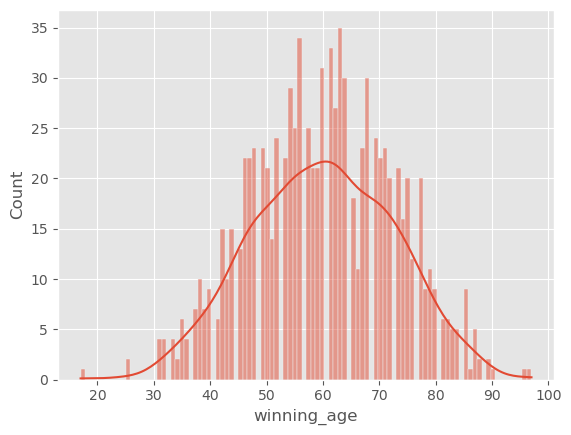

In [29]:
sns.histplot(df['winning_age'], kde = True, bins = 100);

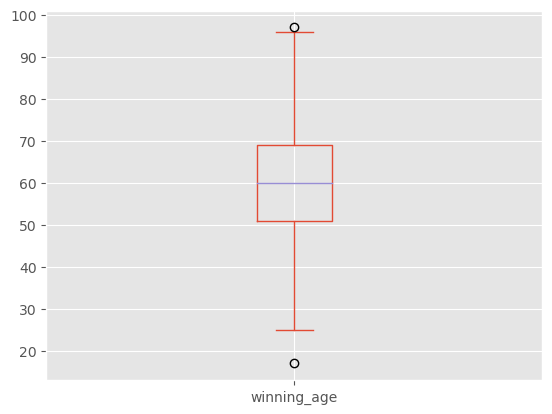

In [26]:
df['winning_age'].plot.box();


Ваша ячейка для содержательных выводов. Что мы можем сказать по этому графику?

## Задание 2

Как меняется возраст лауреатов в зависимости от категории премии?

Используйте [.boxplot()](https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot), чтобы показать, как среднее, квартили, максимальное и минимальное значения различаются по категориям. 

У какой категории самые длинные "усы"?

В какой призовой категории средние победители самые старые?

В какой призовой категории средние победители самые молодые?

In [ ]:
# ваш код для визуализации

Ваша ячейка для содержательных выводов. Что мы можем сказать по этому графику?

## Задание 3

Постройте [stacked bar chart](https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_stacked.html), который показывает количество мужчин- и женщин-победителей по категориям.

Сколько премий получили женщины в области литературы по сравнению с физикой?

In [ ]:
# ваш код для визуализации

Ваша ячейка для содержательных выводов. Что мы можем сказать по этому графику?